# Text-Prediction

In [2]:
import numpy as np
import tensorflow.keras.utils as ku 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer
from tensorflow.keras.models import model_from_json

# Tokenizing the data

In [3]:
tokenizer = Tokenizer()
data = open('TP.txt').read()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


# Creating input sequence to feed the neural network

In [4]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [5]:
corpus[5]

'his armour-like back, and if he lifted his head a little he could'

In [6]:
tokenizer.word_index['lifted']


447

In [7]:
input_sequences


[[52, 139],
 [52, 139, 55],
 [52, 139, 55, 14],
 [52, 139, 55, 14, 93],
 [52, 139, 55, 14, 93, 935],
 [52, 139, 55, 14, 93, 935, 28],
 [52, 139, 55, 14, 93, 935, 28, 1313],
 [52, 139, 55, 14, 93, 935, 28, 1313, 936],
 [52, 139, 55, 14, 93, 935, 28, 1313, 936, 4],
 [52, 139, 55, 14, 93, 935, 28, 1313, 936, 4, 241],
 [42, 1314],
 [42, 1314, 10],
 [42, 1314, 10, 5],
 [42, 1314, 10, 5, 112],
 [42, 1314, 10, 5, 112, 49],
 [42, 1314, 10, 5, 112, 49, 12],
 [42, 1314, 10, 5, 112, 49, 12, 721],
 [42, 1314, 10, 5, 112, 49, 12, 721, 1315],
 [42, 1314, 10, 5, 112, 49, 12, 721, 1315, 4],
 [42, 1314, 10, 5, 112, 49, 12, 721, 1315, 4, 159],
 [42, 1314, 10, 5, 112, 49, 12, 721, 1315, 4, 159, 25],
 [5, 1316],
 [5, 1316, 84],
 [5, 1316, 84, 45],
 [5, 1316, 84, 45, 3],
 [5, 1316, 84, 45, 3, 33],
 [5, 1316, 84, 45, 3, 33, 4],
 [5, 1316, 84, 45, 3, 33, 4, 447],
 [5, 1316, 84, 45, 3, 33, 4, 447, 5],
 [5, 1316, 84, 45, 3, 33, 4, 447, 5, 85],
 [5, 1316, 84, 45, 3, 33, 4, 447, 5, 85, 12],
 [5, 1316, 84, 45, 3,

# Padding the sequence

In [8]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [9]:
input_sequences.shape


(20205, 17)

In [10]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [11]:
predictors[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        52, 139,  55])

# Creating a sequential model using LSTM

In [12]:
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_len-1))  
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))  
model.add(LSTM(100))  
model.add(Dense(total_words/2, activation='relu'))  
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 50)            130850    
_________________________________________________________________
bidirectional (Bidirectional (None, 16, 300)           241200    
_________________________________________________________________
dropout (Dropout)            (None, 16, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1308)              132108    
_________________________________________________________________
dense_1 (Dense)              (None, 2617)              3425653   
Total params: 4,090,211
Trainable params: 4,090,211
Non-trainable params: 0
______________________________________________

In [13]:
history = model.fit(predictors, label, epochs=100, verbose=1)


Epoch 1/100
632/632 [==============================] - 32s 50ms/step - loss: 0.5798 - accuracy: 0.8275
Epoch 2/100
632/632 [==============================] - 32s 51ms/step - loss: 0.5569 - accuracy: 0.8323
Epoch 3/100
632/632 [==============================] - 33s 53ms/step - loss: 0.5414 - accuracy: 0.8362
Epoch 4/100
632/632 [==============================] - 39s 62ms/step - loss: 0.5324 - accuracy: 0.8417
Epoch 5/100
632/632 [==============================] - 38s 60ms/step - loss: 0.5087 - accuracy: 0.8476
Epoch 6/100
632/632 [==============================] - 34s 53ms/step - loss: 0.4974 - accuracy: 0.8508
Epoch 7/100
632/632 [==============================] - 34s 54ms/step - loss: 0.5026 - accuracy: 0.8483
Epoch 8/100
632/632 [==============================] - 35s 56ms/step - loss: 0.4889 - accuracy: 0.8537
Epoch 9/100
632/632 [==============================] - 34s 54ms/step - loss: 0.4747 - accuracy: 0.8578
Epoch 10/100
632/632 [==============================] - 35s 55ms/step - l

# Saving the trained model

In [13]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved")

Saved


# Plotting the accuracy

In [15]:
def plot_graph(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()


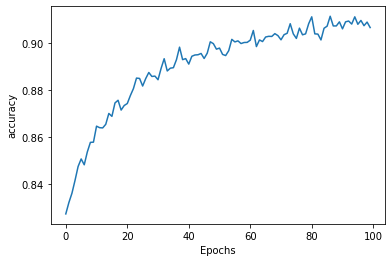

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_graph(history,'accuracy')

# Loading the saved model

In [14]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded")

Loaded


# Testing the model

In [18]:
model = loaded_model

In [23]:
seed_text = "where"
next_words = 5
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word =""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

where is our breakfast the middle
